Initial matrices and coefficients for inverted pendulum system.

In [0]:
import numpy as np

g = 9.8
m = 1
M = 4
l = 0.8

t = np.linspace(0,15,1000)

A = np.array([[0,             0, 1, 0],
              [0,             0, 0, 1],
              [0,         m*g/M, 0, 0],
              [0, (M+m)*g/(M*l), 0, 0]])

B = np.array([[0],[0], [1/M], [1/(M*l)]])

Check whether the system is stable or not

In [0]:
e, v = np.linalg.eig(A)
print("Eigenvalues of A:", e)

Eigenvalues of A: [ 0.          0.          3.91311896 -3.91311896]


Check the controllability

In [0]:
C = np.concatenate([B, A.dot(B), A.dot(A).dot(B), A.dot(A).dot(A).dot(B)], axis=1)
print(np.linalg.matrix_rank(C))

4


State feedback controller for linearized system using pole placement method

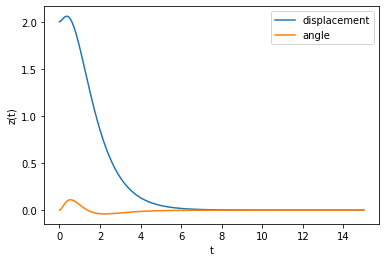

In [0]:
from math import sin
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.signal import place_poles
import math 

def ODE(x0, time, arg):
  u = -arg.dot(x0)
  return A.dot(x0) + B.dot(u)

poles = np.array([-1,-2,-3,-4])
K = place_poles(A,B, poles).gain_matrix
x0 = np.array([2,0,0,0])
solution1 = odeint(ODE, x0, t, (K, ))
plt.plot(t, solution1[:,0], label='displacement')
plt.plot(t, solution1[:,1], label='angle')
plt.legend()
plt.xlabel('t')
plt.ylabel('z(t)')
plt.show()

State feedback controller for linearized system using LQR method

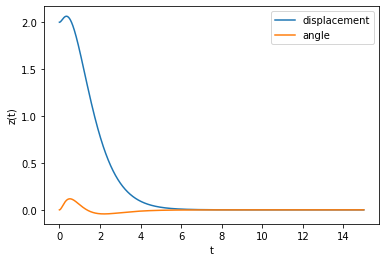

In [0]:
from scipy.linalg import solve_continuous_are as are

Q = np.array([[1, 0, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])
Q = Q.dot(100)
R = np.array([[1]])
S = are(A, B, Q, R)

K = (B.transpose()).dot(S)

solution1 = odeint(ODE, x0, t, (K,))
plt.plot(t, solution1[:,0], label='displacement')
plt.plot(t, solution1[:,1], label='angle')
plt.legend()
plt.xlabel('t')
plt.ylabel('z(t)')
plt.show()